## Évaluation de la satisfaction client à base de leurs commentaires

In [1]:
import numpy as np
from sklearn.base import clone
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('bank.xlsx')
df

,Customer Satisfaction,Real Estate Savings,Number of Real Estate Credits,Number of Withdrawals,Risk of Default,Product Type,Number of Advices,Number of BOT Advices,Number of Transfers,Gender,Home Savings Plan,Age,Education,Income
0,"A very high-quality after-sales service, perfe...",yes,0,13,yes,C,0,1,0,M,yes,31,5.0,393
1,"Unique products offered at affordable prices, ...",yes,0,11,yes,C,4,0,0,F,yes,34,2.0,347
2,Increase in bank card fees but not excellent q...,yes,0,15,yes,C,0,1,0,F,yes,30,5.0,1172
3,Increasing prices is conceivable but with cons...,yes,0,11,yes,C,1,0,0,F,yes,32,4.0,2392
4,"A very high-quality customer relationship, wit...",yes,1,12,yes,C,0,2,13,F,yes,28,5.0,2777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,"The content of banking services is enriched, a...",yes,1,13,no,B,1,0,31,M,yes,31,6.0,5007
98,"Frankly, their website is really well designed...",yes,0,14,no,C,1,0,26,F,yes,45,2.0,1397
99,"A very high-quality after-sales service, perfe...",yes,2,14,no,B,1,0,24,F,yes,31,0.2,4173
100,"Unique products offered at affordable prices, ...",yes,1,15,no,C,0,4,17,M,yes,58,0.0,4241


In [3]:
# Corpus avec tous les commentaires
corpus = []
for comments in df['Customer Satisfaction'] :
    corpus.append(comments)
corpus

['A very high-quality after-sales service, perfectly meeting expectations.',
 'Unique products offered at affordable prices, it’s an excellent offer!',
 'Increase in bank card fees but not excellent quality of financial products!',
 'Increasing prices is conceivable but with consistently quality service, good!',
 'A very high-quality customer relationship, with personalized and efficient support!',
 'Perfect for my bank card and savings accounts!',
 'Very satisfied with my new bank card and my online savings account, it’s great!',
 'Ideal for young people, with good products and impeccable customer service.',
 'Excellent customer relationship, always attentive! It’s truly a real bank.',
 'The content of banking services is enriched, and the bank card subscription remains competitive.',
 'Frankly, their website is really well designed and practical, even for those new to trading!',
 'A very high-quality after-sales service, perfectly meeting expectations.',
 'Unique products offered at 

### Vectorisation 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2,3), max_df = 0.99, min_df = 0.01, max_features=30, norm = 'l2', binary = False)
vectors = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf 

,bank card,bank card and,card and,card fees,card fees but,customer relationship,excellent offer,excellent quality of,fees but,fees but not,...,products offered,products offered at,quality of,quality of financial,sales service,sales service perfectly,service perfectly,service perfectly meeting,very high,very high quality
0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.378122,0.378122,0.378122,0.378122,0.308284,0.308284
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.175354,0.0,0.0,0.284202,0.284202,0.000000,0.000000,0.284202,0.284202,0.284202,...,0.000000,0.000000,0.284202,0.284202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.507236,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497565,0.497565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.378122,0.378122,0.378122,0.378122,0.308284,0.308284
100,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Regroupement des commentaires en commentaires positifs et négatifs ayant une proximité lexicale : méthode de k-means

In [7]:
# Regroupement des commentaires en deux clusters distincts: 0 et 1
model = KMeans(n_clusters=2, random_state=9)
X = np.asarray(tf_idf)
model.fit(X) 
model.labels_ 

C:\Users\cleme\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [8]:
# Insert des labels du clusters précédent
tf_idf.insert(0, 'label', model.labels_)
# création de deux base 0 pr les labels 0 et 1 pr le label 1
data_label_0 = tf_idf.loc[tf_idf['label'] == 0]
data_label_1 = tf_idf.loc[tf_idf['label'] == 1]

In [9]:
# Label 1 ou cluester 1
data_label_1 = data_label_1.drop(['label'], axis=1)
mean_1 = data_label_1.describe().loc['mean'] 
# classement par les scores tf idf les plus importants
mean_1_sorted = mean_1.sort_values(ascending=False)

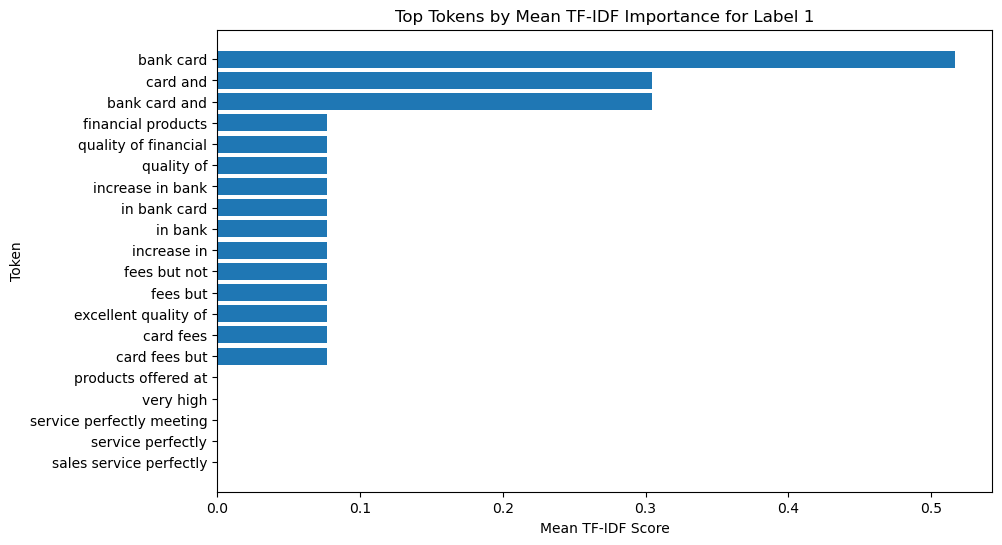

In [10]:
# Graphique des 20 mots les plus influents 
top_tokens = mean_1_sorted.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_tokens.index, top_tokens.values)
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Token')
plt.title('Top Tokens by Mean TF-IDF Importance for Label 1')
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
# dans le cluster 1 les bigrammes et trigrammes qui resortent sont : bank card; card and; bank card and ... : C'est un cluter qui parle de carte banquaire donc compliquer d'analyser la satisfaction des clients 
# On a pas d'informations sur la satisfaction client dans ce cluster

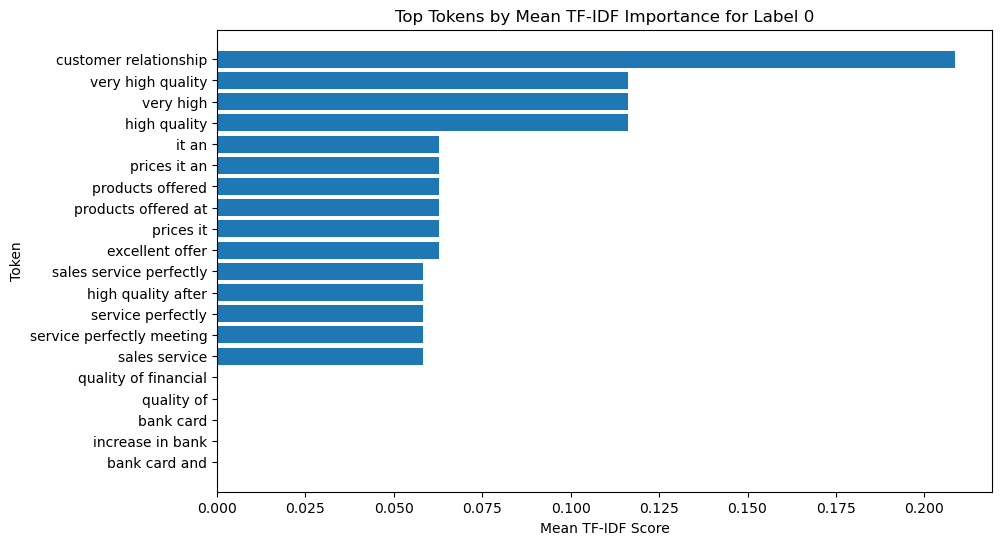

In [11]:
# Label 0
data_label_0 = data_label_0.drop(['label'], axis=1)
mean_0 = data_label_0.describe().loc['mean']
mean_0_sorted = mean_0.sort_values(ascending=False)
# Selection des 20 tokens pr la visualisation
top_tokens = mean_0_sorted.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_tokens.index, top_tokens.values)
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Token')
plt.title('Top Tokens by Mean TF-IDF Importance for Label 0')
plt.gca().invert_yaxis()  
plt.show()

In [ ]:
# Dans ce cluster; on a des informations sur la satisfaction des clients, relation client sauf qu'on ne sais pas si c'est positif ou négatif
# Ce cluster est très mélanger, on arrive pas à déterminer le ressenti des clients

## ACP sur TF-IDF

C:\Users\cleme\AppData\Local\Temp\ipykernel_1780\1983054247.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jitter_x = principal_df['PC1'][i] + np.random.normal(0, 0.9)
C:\Users\cleme\AppData\Local\Temp\ipykernel_1780\1983054247.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jitter_y = principal_df['PC2'][i] + np.random.normal(0, 0.9)


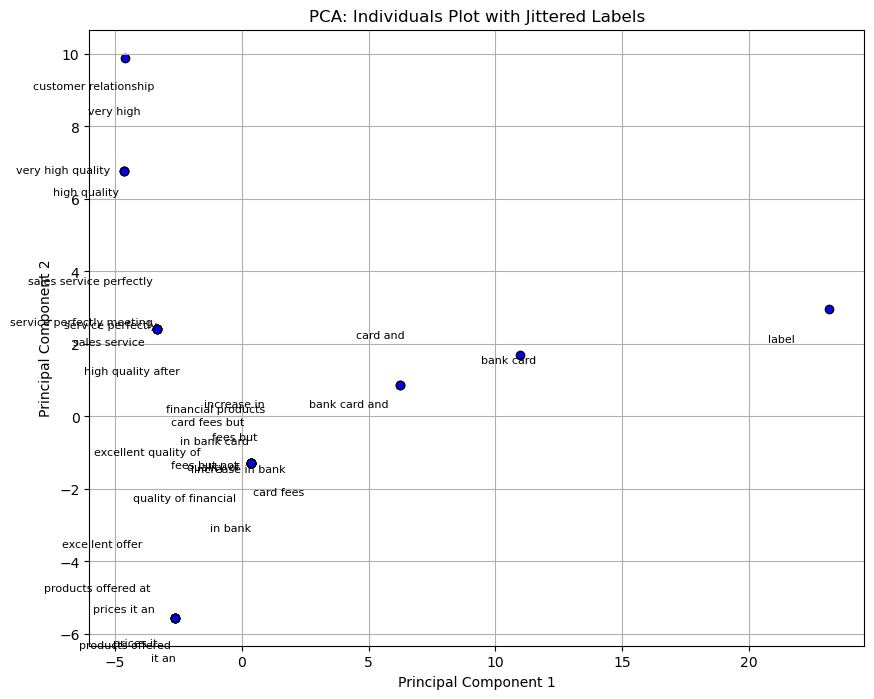

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# transposer le la matrice tf-idf
data = tf_idf.T 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Application du PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=data.index)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue', edgecolor='k')

# Ajout des labels
for i, individual in enumerate(tf_idf.columns):
    jitter_x = principal_df['PC1'][i] + np.random.normal(0, 0.9)
    jitter_y = principal_df['PC2'][i] + np.random.normal(0, 0.9)
    plt.text(jitter_x, jitter_y, individual, ha='right', va='bottom', fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Individuals Plot with Jittered Labels')
plt.grid()
plt.show()


## Du non-supervisé au supervisé

In [ ]:
# On peut passer du non superviser au superviser car on a créer des labels avec le K-means donc on peut prédire le y binaire avec une regression Logistique

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Definir la cible (labels des kmeans)
y = model.labels_
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)
# Classifieur logit
clf = LogisticRegression(penalty="l1", tol=0.01, solver="saga")
clf.fit(X_train, y_train)   
# predict
y_pred = clf.predict(X_test)
# Rapport de classification
report = classification_report(y_test, y_pred, target_names=['label 0', 'label 1'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     label 0       1.00      1.00      1.00        13
     label 1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

